---
title: Lector de Datos de Precipitación Mensual - IDEAM
description: Procesamiento de los datos crudos de precipitación mensual proporcionados por el IDEAM
authors:
  - name: Jorge Alpala
    affiliation: Unidad Nacional para la Gestión del Riesgo de Desastres, Subdirección para el Conocimiento del Riesgo
date: 2024-07-05
downloads:
  - file: lector-precipitacion-mensual.ipynb
    title: Download notebook
---

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/scr-ungrd/riesgos/blob/main/notebooks/lector-precipitacion-mensual.ipynb)

# Descripción
Este script lee y procesa los datos crudos de precipitación mensual proporcionados por el IDEAM (Instituto de Hidrología, Meteorología y Estudios Ambientales de Colombia). Genera una serie de gráficos y estadísticas que permiten analizar los patrones de precipitación a lo largo del tiempo.

In [ ]:
# @title Importar librerías y datos de precipitación en formato CSV
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.table import Table

dataframe=pd.read_csv('descargaDhime_CHUNGACASPI.csv',delimiter=',') # lee el archivo csv, utiliza pd.read_csv('nombre_del_archivo.csv')
dataframe.head (5)   # Con el nombre del dataframe en este caso data_frame puede ver su contenido.

,CodigoEstacion,NombreEstacion,Variable,Parametro,Fecha,Unidad,Valor,NivelAprobacion
0,47010050,CHUNGACASPI [47010050],PRECIPITACION,Precipitación total mensual,2005-01-01 00:00,mm,111.3,Definitivo
1,47010050,CHUNGACASPI [47010050],PRECIPITACION,Precipitación total mensual,2005-02-01 00:00,mm,230.4,Definitivo
2,47010050,CHUNGACASPI [47010050],PRECIPITACION,Precipitación total mensual,2005-03-01 00:00,mm,160.1,Definitivo
3,47010050,CHUNGACASPI [47010050],PRECIPITACION,Precipitación total mensual,2005-04-01 00:00,mm,382.3,Definitivo
4,47010050,CHUNGACASPI [47010050],PRECIPITACION,Precipitación total mensual,2005-05-01 00:00,mm,352.0,Definitivo


Shape:  (247, 8)
Columnas:  Index(['CodigoEstacion', 'NombreEstacion', 'Variable', 'Parametro', 'Fecha',
       'Unidad', 'Valor', 'NivelAprobacion'],
      dtype='object')


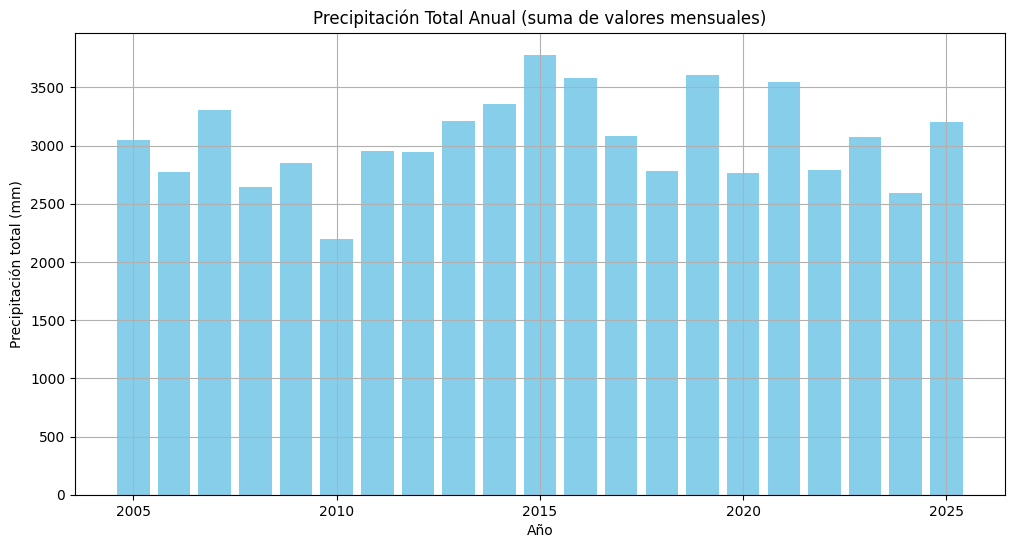

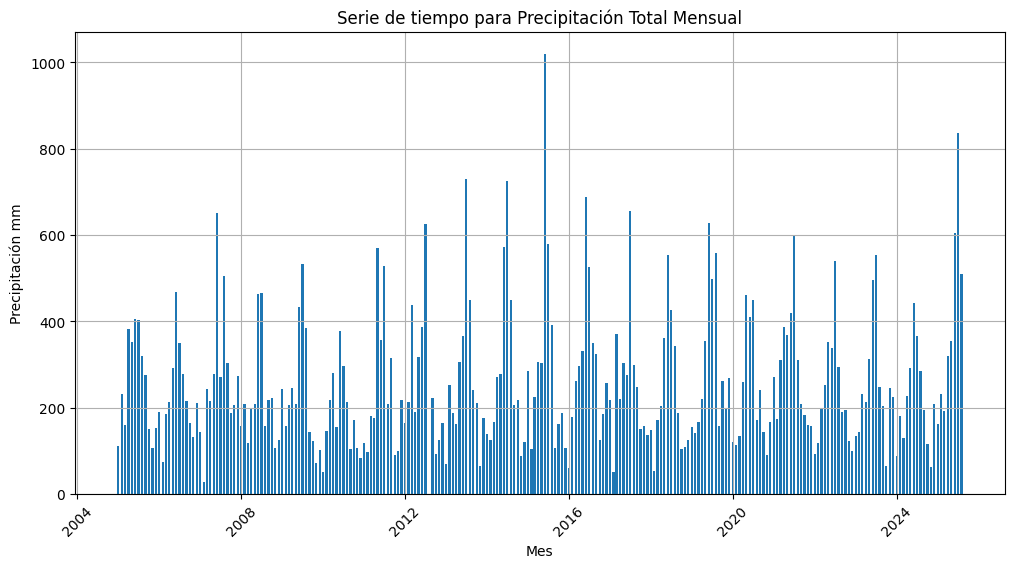

/tmp/ipython-input-2733423581.py:70: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  estadisticas_mensuales = pd.concat([estadisticas_mensuales, fila_anual], ignore_index=True)


            Mes     promedio  minimo  maximo  mediana  desviacion_estandar
0           Ene   148.423810    50.3   285.6   143.40            64.807939
1           Feb   143.671429    27.1   251.3   143.10            63.300831
2           Mar   214.047619   118.6   438.6   191.60            78.514595
3           Abr   249.404762   161.4   387.7   226.50            61.648272
4           May   321.685714   154.2   570.0   312.50            86.342807
5           Jun   492.933333   274.6  1019.8   441.30           164.189730
6           Jul   522.066667   271.6   835.4   527.60           145.285585
7           Ago   336.005000   157.8   557.8   314.40           114.174370
8           Sep   215.160000   104.7   323.9   211.45            61.058224
9           Oct   156.560000    64.9   262.6   156.25            50.978286
10          Nov   131.280000    63.2   245.1   115.35            51.288222
11          Dic   168.975000    82.2   273.7   161.45            58.951120
12  Total Anual  3100.213

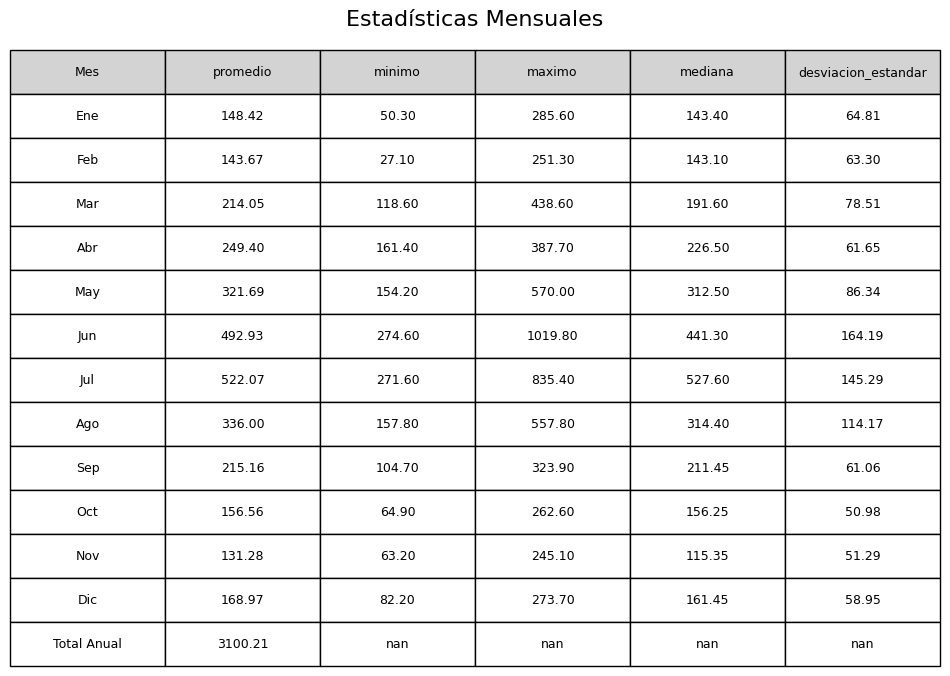

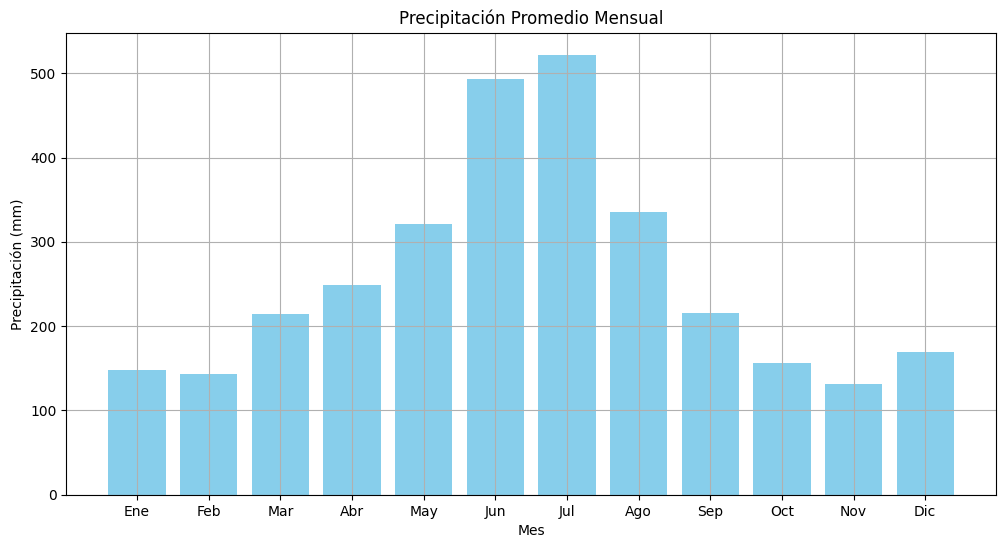

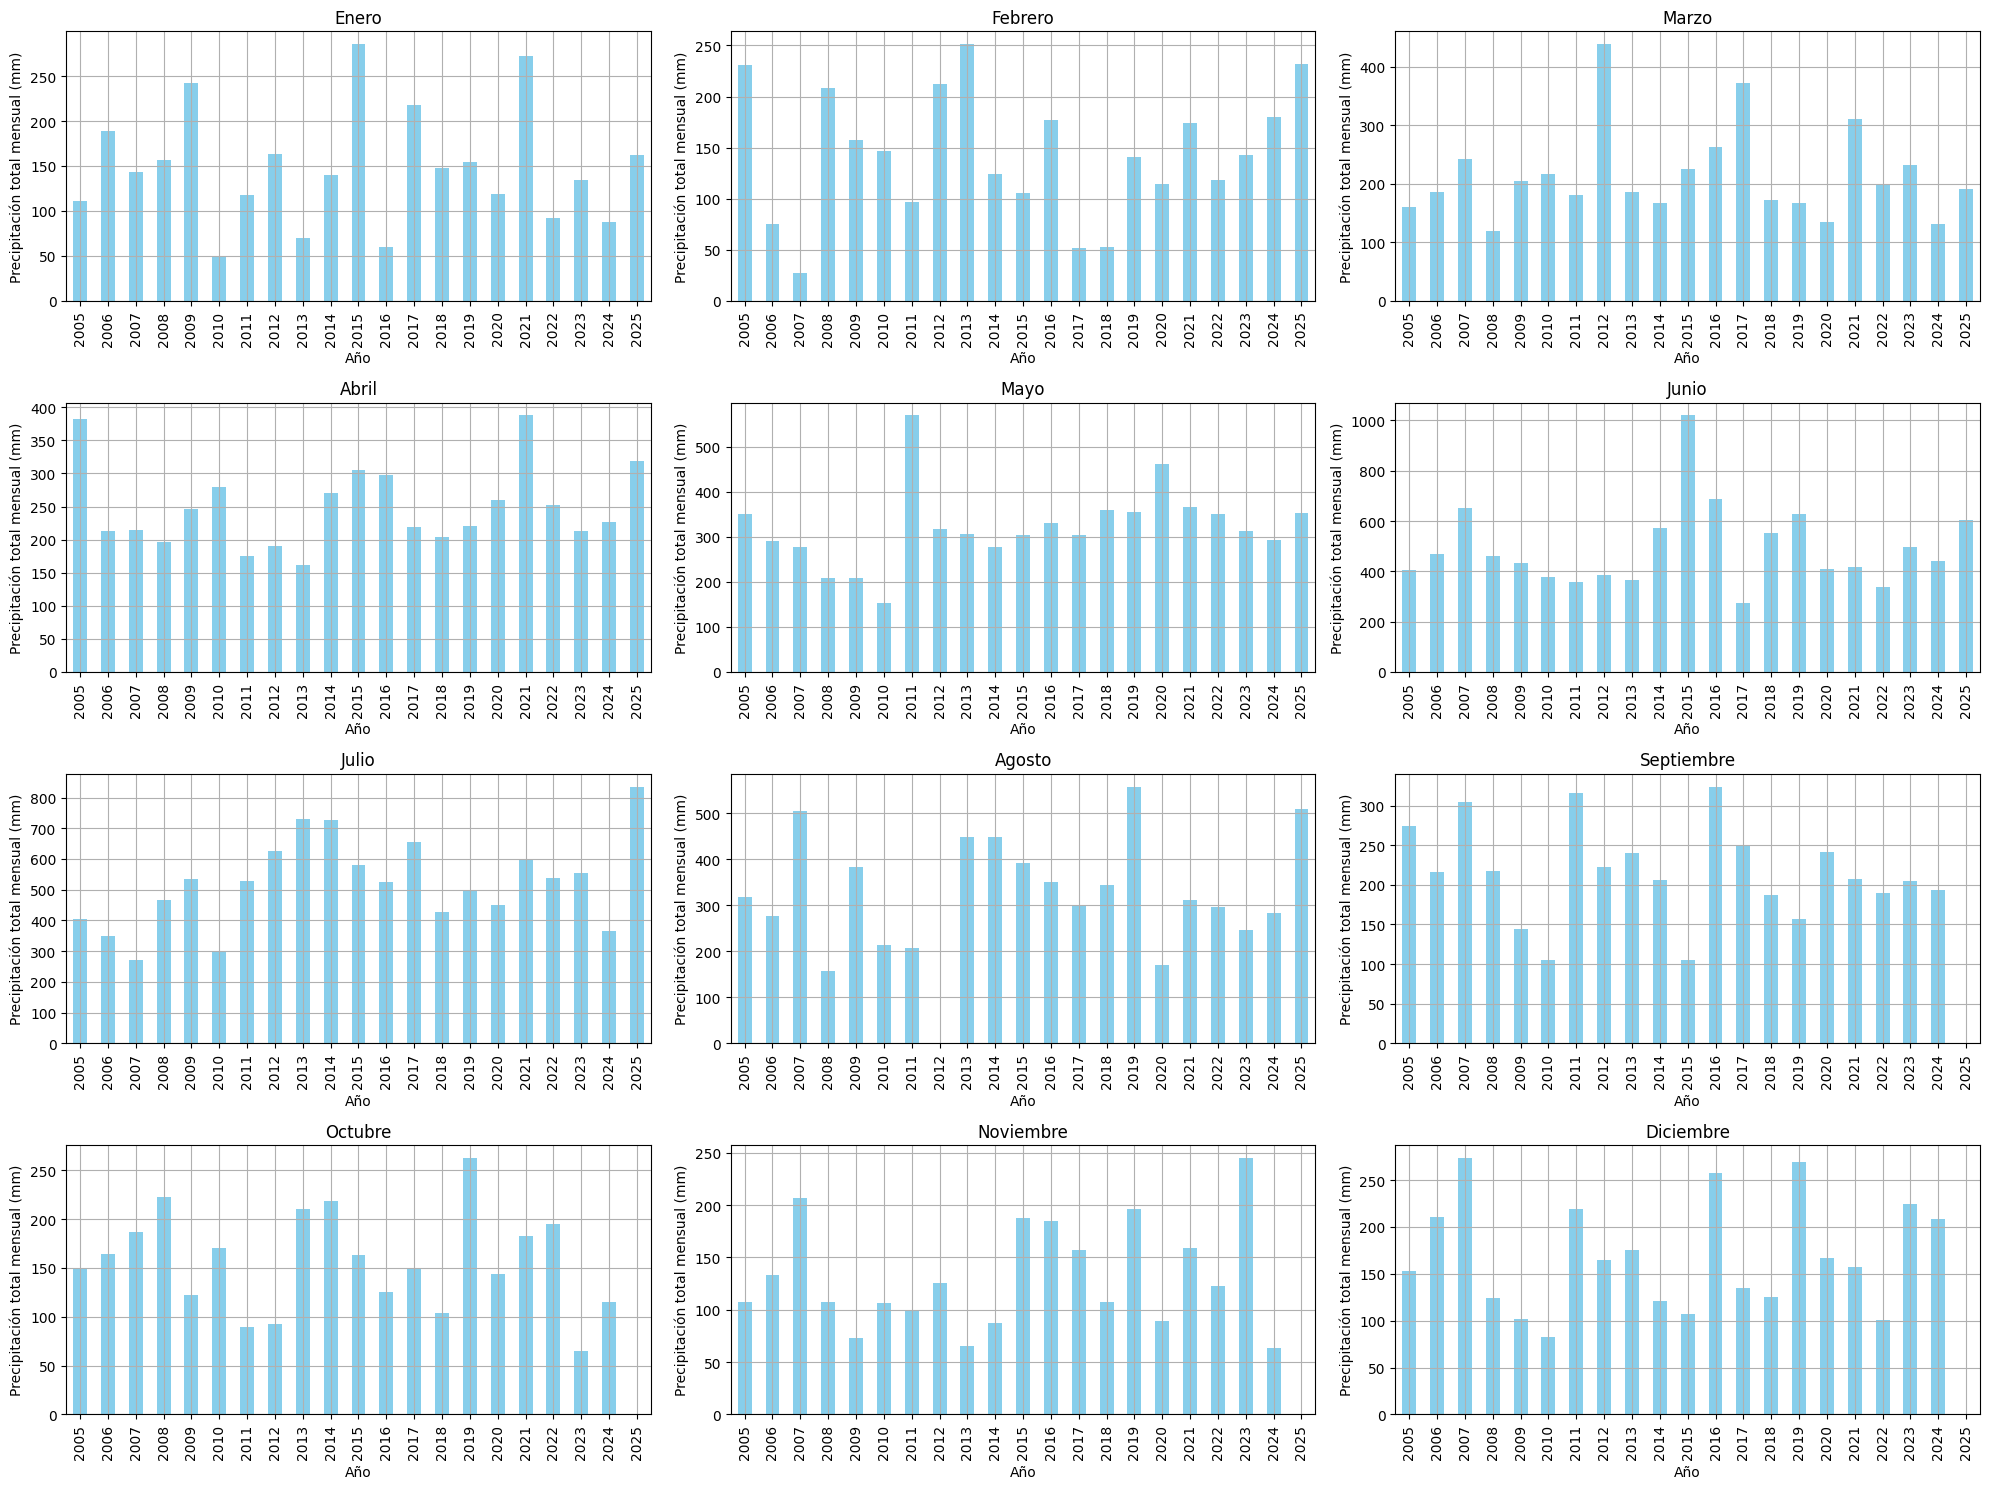

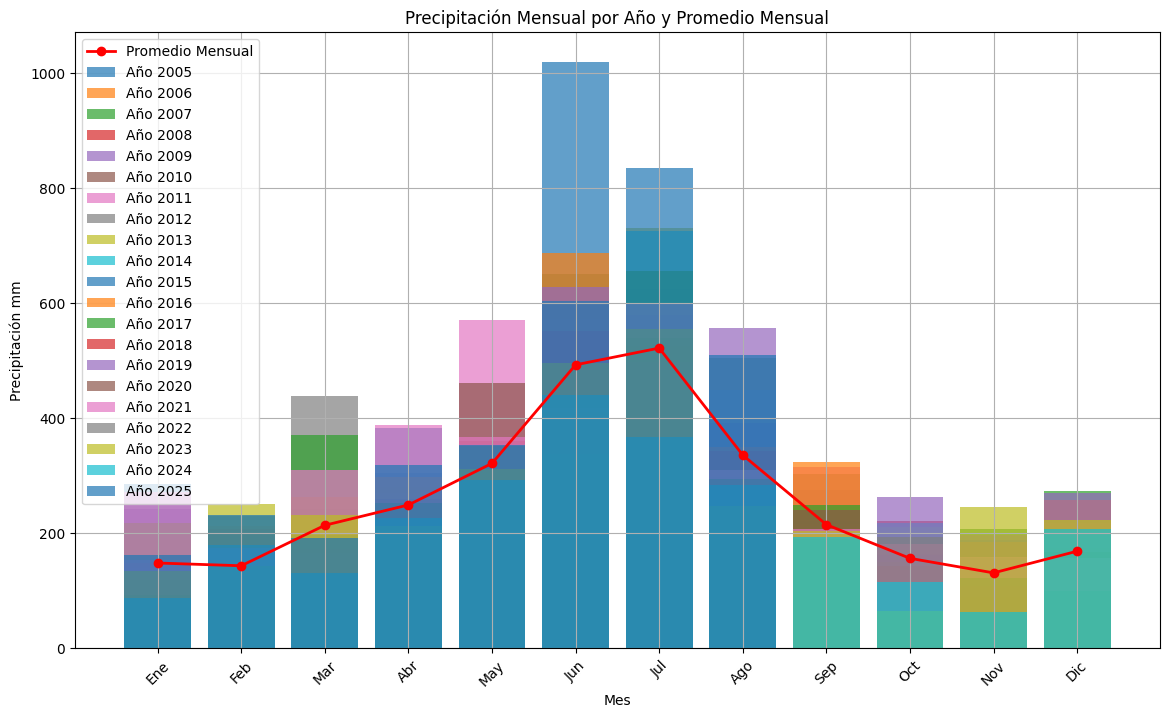

/tmp/ipython-input-2733423581.py:220: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors = plt.cm.get_cmap('tab20', 12)


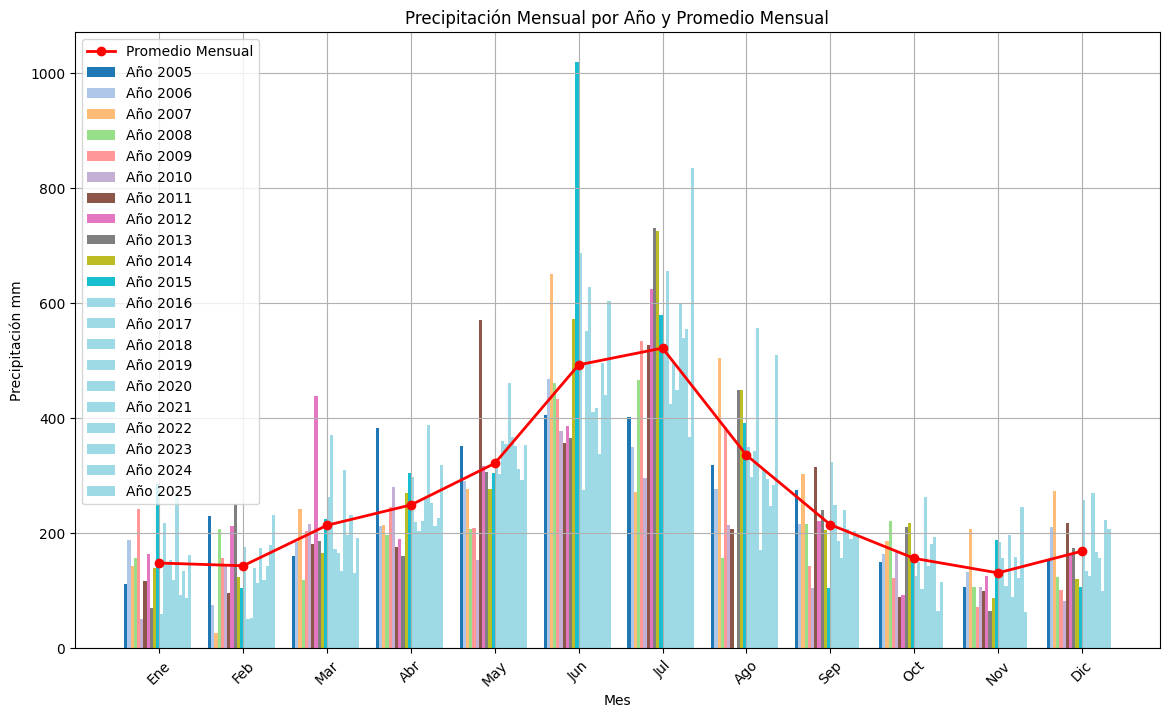

In [ ]:
# @title Procesamiento

print("Shape: ", dataframe.shape)
print("Columnas: ", dataframe.columns)

# Convertir la columna 'Fecha' a formato datetime
dataframe['Fecha'] = pd.to_datetime(dataframe['Fecha'], format='%Y-%m-%d %H:%M')

# ================================
# 1. Gráfica de precipitación anual (suma de meses por año)
# ================================
dataframe['Año'] = dataframe['Fecha'].dt.year
df_anual = dataframe.groupby('Año')['Valor'].sum().reset_index()

plt.figure(figsize=(12, 6))
plt.bar(df_anual['Año'], df_anual['Valor'], color='skyblue')
plt.xlabel('Año')
plt.ylabel('Precipitación total (mm)')
plt.title('Precipitación Total Anual (suma de valores mensuales)')
plt.grid(True)
plt.show()

# Crear una columna adicional para el mes y el año
dataframe['AñoMes'] = dataframe['Fecha'].dt.to_period('M')

# Agrupar los datos por mes y calcular el valor promedio
df_mensual = dataframe.groupby('AñoMes')['Valor'].mean().reset_index()

# Convertir de nuevo 'AñoMes' a datetime para facilitar la graficación
df_mensual['AñoMes'] = df_mensual['AñoMes'].dt.to_timestamp()

# Plotear la gráfica de barras del valor promedio mensual
plt.figure(figsize=(12, 6))
plt.bar(df_mensual['AñoMes'], df_mensual['Valor'], width=20)  # Ajusta el ancho de las barras según sea necesario
plt.xlabel('Mes')
plt.ylabel('Precipitación mm')
plt.title('Serie de tiempo para Precipitación Total Mensual')
plt.xticks(rotation=45)  # Rotar las etiquetas del eje x para mayor legibilidad
plt.grid(True)
plt.show()

# Extraer el mes de la columna 'Fecha'
dataframe['Mes'] = dataframe['Fecha'].dt.month

# Agrupar los datos por mes y calcular estadísticas
estadisticas_mensuales = dataframe.groupby('Mes')['Valor'].agg(
    promedio='mean',
    minimo='min',
    maximo='max',
    mediana='median',
    desviacion_estandar='std'
).reset_index()

# Reemplazar los valores numéricos del mes por los nombres de los meses
nombres_meses = ['Ene', 'Feb', 'Mar', 'Abr', 'May', 'Jun', 'Jul', 'Ago', 'Sep', 'Oct', 'Nov', 'Dic']
estadisticas_mensuales['Mes'] = estadisticas_mensuales['Mes'].apply(lambda x: nombres_meses[x-1])

# Calcular la precipitación promedio anual
precipitacion_promedio_anual = estadisticas_mensuales['promedio'].sum()

# Añadir la fila de la precipitación promedio anual al DataFrame
fila_anual = pd.DataFrame({
    'Mes': ['Total Anual'],
    'promedio': [precipitacion_promedio_anual],
    'minimo': [None],
    'maximo': [None],
    'mediana': [None],
    'desviacion_estandar': [None]
})
estadisticas_mensuales = pd.concat([estadisticas_mensuales, fila_anual], ignore_index=True)

# Mostrar las estadísticas
print(estadisticas_mensuales)

# Crear tabla
fig, ax = plt.subplots(figsize=(12, 8))
ax.axis('tight')
ax.axis('off')

tabla = Table(ax, bbox=[0, 0, 1, 1])

# Agregar cabeceras a la tabla
ncols = len(estadisticas_mensuales.columns)
nrows = len(estadisticas_mensuales) + 1

# Agregar celda de cabeceras
for j, column in enumerate(estadisticas_mensuales.columns):
    tabla.add_cell(0, j, 1/ncols, 1/nrows, text=column, loc='center', facecolor='lightgrey')

# Agregar celdas de datos
for i in range(len(estadisticas_mensuales)):
    for j, column in enumerate(estadisticas_mensuales.columns):
        value = estadisticas_mensuales.iloc[i][column]
        if isinstance(value, float):
            value = f'{value:.2f}'
        tabla.add_cell(i+1, j, 1/ncols, 1/nrows, text=value if value is not None else '', loc='center')

ax.add_table(tabla)

# Agregar título a la tabla
plt.text(0.5, 1.05, 'Estadísticas Mensuales', ha='center', va='center', fontsize=16, transform=ax.transAxes)

plt.show()

# Filtrar el DataFrame para excluir la fila "Total Anual"
estadisticas_mensuales_meses = estadisticas_mensuales[estadisticas_mensuales['Mes'] != 'Total Anual']

# Plotear la gráfica de barras para el valor promedio mensual
plt.figure(figsize=(12, 6))
plt.bar(estadisticas_mensuales_meses['Mes'], estadisticas_mensuales_meses['promedio'], color='skyblue')
plt.xlabel('Mes')
plt.ylabel('Precipitación (mm)')
plt.title('Precipitación Promedio Mensual')
plt.xticks(ticks=range(12), labels=nombres_meses)
plt.grid(True)
plt.show()

# Extraer el año y el mes de la columna 'Fecha'
dataframe['Año'] = dataframe['Fecha'].dt.year
dataframe['Mes'] = dataframe['Fecha'].dt.month

# Agrupar los datos por año y mes y calcular el valor promedio
df_agrupado = dataframe.groupby(['Año', 'Mes'])['Valor'].mean().unstack()

# Crear una gráfica de barras para cada mes
fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(20, 15))
meses = ['Enero', 'Febrero', 'Marzo', 'Abril', 'Mayo', 'Junio', 'Julio', 'Agosto', 'Septiembre', 'Octubre', 'Noviembre', 'Diciembre']

for i, ax in enumerate(axes.flatten()):
    mes = i + 1
    if mes in df_agrupado.columns:
        df_agrupado[mes].plot(kind='bar', ax=ax, color='skyblue')
        ax.set_title(meses[i])
        ax.set_xlabel('Año')
        ax.set_ylabel('Precipitación total mensual (mm)')
        ax.grid(True)

plt.tight_layout()
plt.show()

# ====================================
# Gráfica apilada por años modo 1
# ====================================
import pandas as pd
import matplotlib.pyplot as plt

# Convertir la columna 'Fecha' a formato datetime
dataframe['Fecha'] = pd.to_datetime(dataframe['Fecha'], format='%Y-%m-%d %H:%M')

# Extraer el año y el mes de la columna 'Fecha'
dataframe['Año'] = dataframe['Fecha'].dt.year
dataframe['Mes'] = dataframe['Fecha'].dt.month

# Agrupar los datos por año y mes y calcular el valor promedio
df_agrupado = dataframe.groupby(['Año', 'Mes'])['Valor'].mean().unstack()

# Calcular los valores promedio para cada mes
promedios_mensuales = dataframe.groupby('Mes')['Valor'].mean()

# Crear un nuevo DataFrame para facilitar la graficación
df_barras = dataframe.groupby(['Año', 'Mes'])['Valor'].mean().unstack()

# Definir nombres de los meses
nombres_meses = ['Ene', 'Feb', 'Mar', 'Abr', 'May', 'Jun', 'Jul', 'Ago', 'Sep', 'Oct', 'Nov', 'Dic']

# Crear la gráfica
fig, ax = plt.subplots(figsize=(14, 8))

# Colores para las barras
colors = plt.cm.tab20.colors

# Graficar barras para cada año en cada mes
for year in df_barras.index:
    ax.bar(nombres_meses, df_barras.loc[year], alpha=0.7, label=f'Año {year}')

# Añadir la línea con los valores promedio para cada mes
ax.plot(nombres_meses, promedios_mensuales, color='red', marker='o', label='Promedio Mensual', linewidth=2)

# Personalizar el gráfico
ax.set_xlabel('Mes')
ax.set_ylabel('Precipitación mm')
ax.set_title('Precipitación Mensual por Año y Promedio Mensual')
ax.legend()
ax.grid(True)
plt.xticks(rotation=45)
plt.show()

# ====================================
# Gráfica apilada por años modo 2
# ====================================
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Convertir la columna 'Fecha' a formato datetime
dataframe['Fecha'] = pd.to_datetime(dataframe['Fecha'], format='%Y-%m-%d %H:%M')

# Extraer el año y el mes de la columna 'Fecha'
dataframe['Año'] = dataframe['Fecha'].dt.year
dataframe['Mes'] = dataframe['Fecha'].dt.month

# Agrupar los datos por año y mes y calcular el valor promedio
df_agrupado = dataframe.groupby(['Año', 'Mes'])['Valor'].mean().unstack()

# Calcular los valores promedio para cada mes
promedios_mensuales = dataframe.groupby('Mes')['Valor'].mean()

# Definir nombres de los meses
nombres_meses = ['Ene', 'Feb', 'Mar', 'Abr', 'May', 'Jun', 'Jul', 'Ago', 'Sep', 'Oct', 'Nov', 'Dic']

# Crear la gráfica
fig, ax = plt.subplots(figsize=(14, 8))

# Definir el número de años y la separación entre grupos de barras
years = df_agrupado.index
num_years = len(years)
bar_width = 0.8 / num_years

# Colores para las barras
colors = plt.cm.get_cmap('tab20', 12)

# Graficar barras para cada año en cada mes
for i, year in enumerate(years):
    positions = np.arange(12) + i * bar_width
    ax.bar(positions, df_agrupado.loc[year], width=bar_width, color=colors(i), label=f'Año {year}')

# Añadir la línea con los valores promedio para cada mes
ax.plot(np.arange(12) + bar_width * (num_years / 2), promedios_mensuales, color='red', marker='o', label='Promedio Mensual', linewidth=2)

# Personalizar el gráfico
ax.set_xlabel('Mes')
ax.set_ylabel('Precipitación mm')
ax.set_title('Precipitación Mensual por Año y Promedio Mensual')
ax.set_xticks(np.arange(12) + bar_width * (num_years / 2))
ax.set_xticklabels(nombres_meses)
ax.legend()
ax.grid(True)
plt.xticks(rotation=45)
plt.show()
